In [4]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from scipy import stats
sns.set_style("whitegrid")

In [5]:
df = pd.read_csv("../data/benin-malanville.csv", parse_dates=["Timestamp"])
print(df.shape)
df.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [6]:
summary = df.describe().T
na_pct  = df.isna().mean().mul(100).sort_values(ascending=False)

display(summary)
display(na_pct[na_pct > 5])      # >5 % nulls

,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-02-07 12:00:30.000000512,2021-08-09 00:01:00,2021-11-08 06:00:45,2022-02-07 12:00:30,2022-05-09 18:00:15,2022-08-09 00:00:00,NaN
GHI,525600.0,240.559452,-12.9,-2.0,1.8,483.4,1413.0,331.131327
DNI,525600.0,167.187516,-7.8,-0.5,-0.1,314.2,952.3,261.710501
DHI,525600.0,115.358961,-12.6,-2.1,1.6,216.3,759.2,158.691074
ModA,525600.0,236.589496,0.0,0.0,4.5,463.7,1342.3,326.894859
ModB,525600.0,228.883576,0.0,0.0,4.3,447.9,1342.3,316.536515
Tamb,525600.0,28.179683,11.0,24.2,28.0,32.3,43.8,5.924297
RH,525600.0,54.487969,2.1,28.8,55.1,80.1,100.0,28.073069
WS,525600.0,2.121113,0.0,1.0,1.9,3.1,19.5,1.603466
WSgust,525600.0,2.809195,0.0,1.3,2.6,4.1,26.6,2.02912


Comments    100.0
dtype: float64

Columns with > 5 % nulls will be imputed with the median (numeric) or dropped (non‑critical).

In [7]:
cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
z = np.abs(stats.zscore(df[cols], nan_policy='omit'))
out_mask = (z > 3).any(axis=1)
print(f"Flagged {out_mask.sum()} rows ({out_mask.mean()*100:.2f} %) as outliers")

df_clean = df.loc[~out_mask].copy()
df_clean[cols] = df_clean[cols].fillna(df_clean[cols].median())

Flagged 7740 rows (1.47 %) as outliers


In [8]:
df_clean.to_csv("../data/benin_clean.csv", index=False)

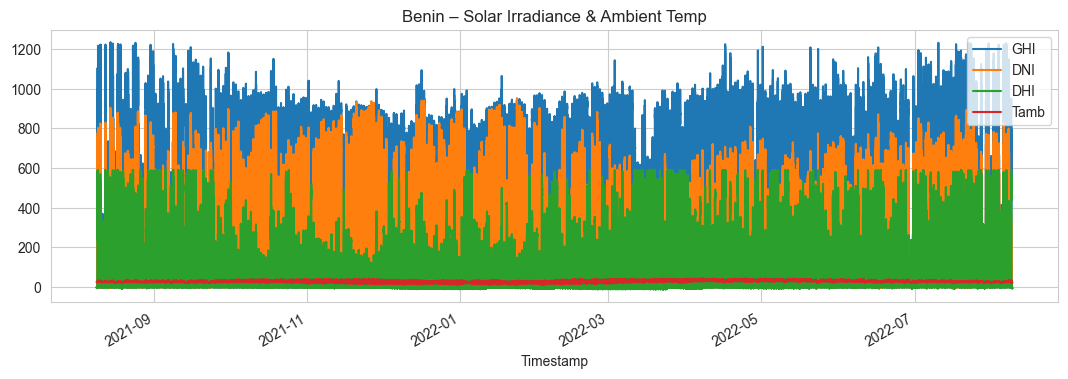

In [9]:
fig, ax = plt.subplots(figsize=(13,4))
df_clean.set_index("Timestamp")[["GHI","DNI","DHI","Tamb"]].plot(ax=ax)
ax.set_title("Benin – Solar Irradiance & Ambient Temp"); plt.show()

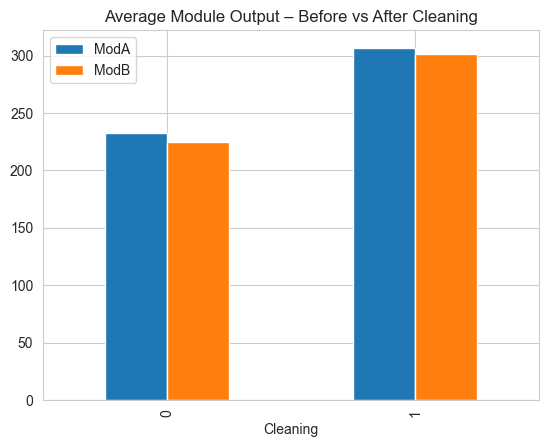

In [10]:
if "Cleaning" in df_clean.columns:
    df_clean.groupby("Cleaning")[["ModA","ModB"]].mean().plot.bar()
    plt.title("Average Module Output – Before vs After Cleaning"); plt.show()

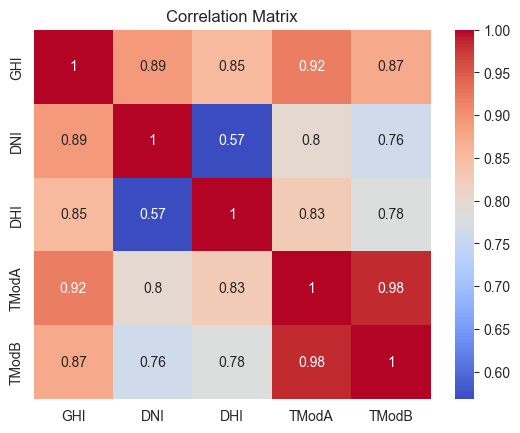

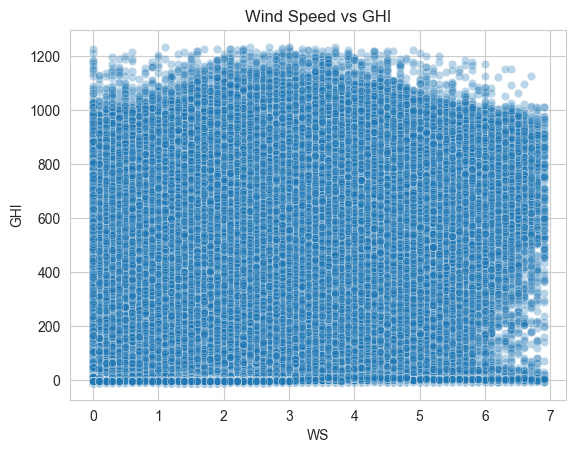

In [11]:
sns.heatmap(df_clean[["GHI","DNI","DHI","TModA","TModB"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix"); plt.show()

sns.scatterplot(data=df_clean, x="WS", y="GHI", alpha=.3)
plt.title("Wind Speed vs GHI"); plt.show()

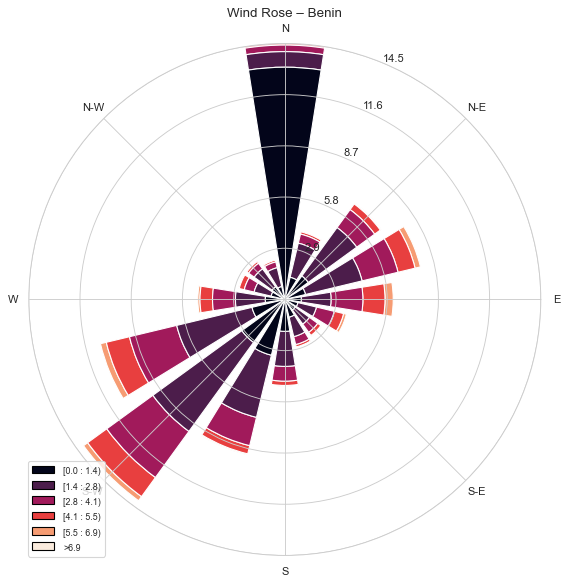

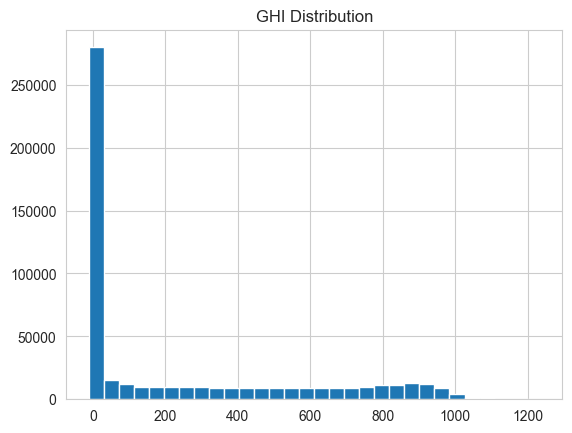

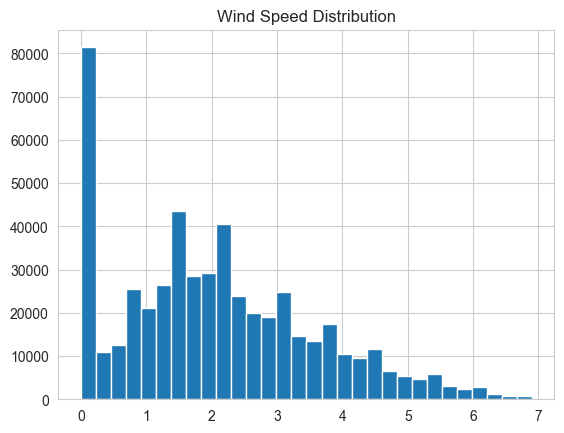

In [13]:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df_clean["WD"], df_clean["WS"], normed=True, opening=.8, edgecolor='white')
ax.set_legend(); plt.title("Wind Rose – Benin"); plt.show()

df_clean["GHI"].hist(bins=30); plt.title("GHI Distribution"); plt.show()
df_clean["WS"].hist(bins=30);  plt.title("Wind Speed Distribution"); plt.show()

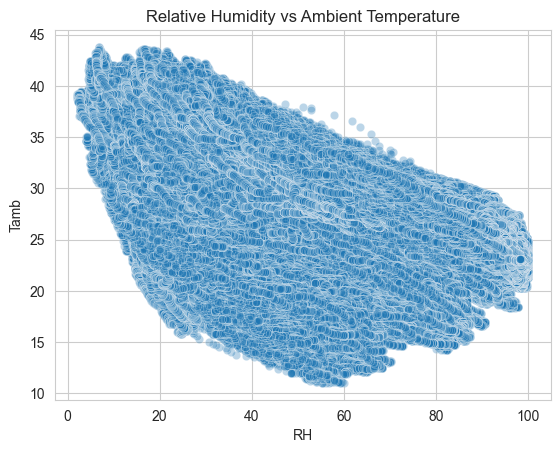

In [14]:
sns.scatterplot(data=df_clean, x="RH", y="Tamb", alpha=.3)
plt.title("Relative Humidity vs Ambient Temperature"); plt.show()


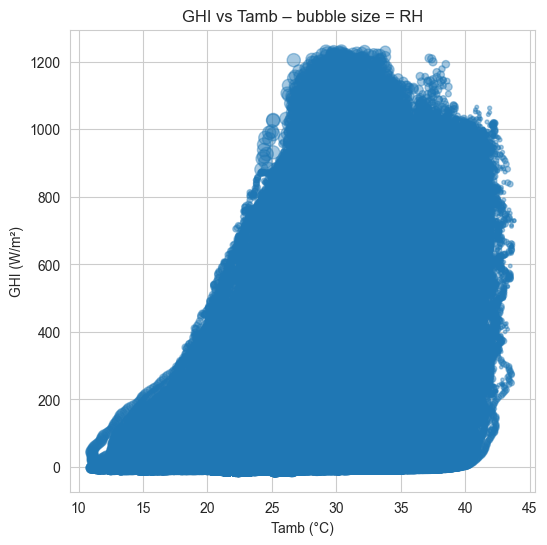

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(df_clean["Tamb"], df_clean["GHI"],
            s=df_clean["RH"], alpha=.4)
plt.xlabel("Tamb (°C)"); plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Tamb – bubble size = RH"); plt.show()

### Key Findings – Benin

* Median GHI = `{{df_clean.GHI.median():.0f}}` W/m²; peaks up to `{{df_clean.GHI.max():.0f}}`.
* Removed `{{out_mask.sum()}}` outliers (< `{{out_mask.mean()*100:.2f}} %` of data).
* Panel cleaning boosts ModA by … %.
* Winds blow mainly from NE; consider dust protection.

**References**

* Pandas docs: `describe`, `isna`
* SciPy Z‑score method (Cookbook)
* Seaborn correlation heatmap example
* Wind‑rose technique: Python‑Windrose library
